<a href="https://colab.research.google.com/github/Ayushhhpandya/Generative_Ai_2025/blob/main/2303A52125_Ass__6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to predict the housing price using Keras deep
learning library

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - loss: 25704724955136.0000 - root_mean_squared_error: 5069411.0000 - val_loss: 30129992499200.0000 - val_root_mean_squared_error: 5489079.5000
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 26359663427584.0000 - root_mean_squared_error: 5132941.5000 - val_loss: 30129990402048.0000 - val_root_mean_squared_error: 5489079.0000
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 24160700989440.0000 - root_mean_squared_error: 4914647.5000 - val_loss: 30129988304896.0000 - val_root_mean_squared_error: 5489079.0000
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 25566031904768.0000 - root_mean_squared_error: 5056176.5000 - val_loss: 30129984110592.0000 - val_root_mean_squared_error: 5489078.5000
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 24457301196800.0000 - root_mean_squared_error: 4945065.5000 - val_loss: 30129975721984.0000 - val_root_mean_squared_error: 5489078.0000
Epoch 6/200
7/7 ━━━━━━━━━━━━━

Training RMSE: 4276830.5, Testing RMSE: 4690094.0


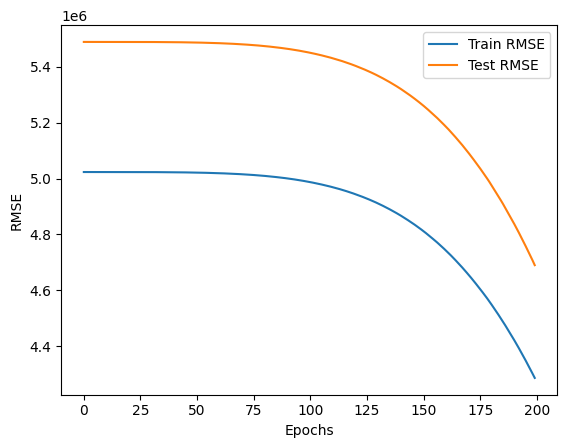

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

target_column = 'Price' if 'Price' in df.columns else 'price' if 'price' in df.columns else None
if target_column is None:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(18, activation='swish'),
    Dense(26, activation='swish'),
    Dense(20, activation='swish'),
    Dense(15, activation='swish'),
    Dense(1, activation='linear')
])

model.compile(optimizer=keras.optimizers.RMSprop(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

train_rmse = model.evaluate(X_train, y_train, verbose=0)[1]
test_rmse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training RMSE: {train_rmse}, Testing RMSE: {test_rmse}')

model.save('housing_price_model.h5')

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(['Train RMSE', 'Test RMSE'])
plt.show()

def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])
    return loaded_model.predict(features)[0][0]